In [1]:
from isbtchot.model import btc_pi
from isbtchot.schemas.args import TypeTime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
# Get btc data with pi indicator
df = btc_pi(time_grouping=TypeTime.WEEK, periods_back=None)[[
    "time", "price", "pi"
]][52*4:]

# Get current pi value
curr = df.pi[df.last_valid_index()]

# Get current pi percentile
pi_values = df.pi.sort_values().to_list()
percentile = pi_values.index(curr) / len(pi_values)


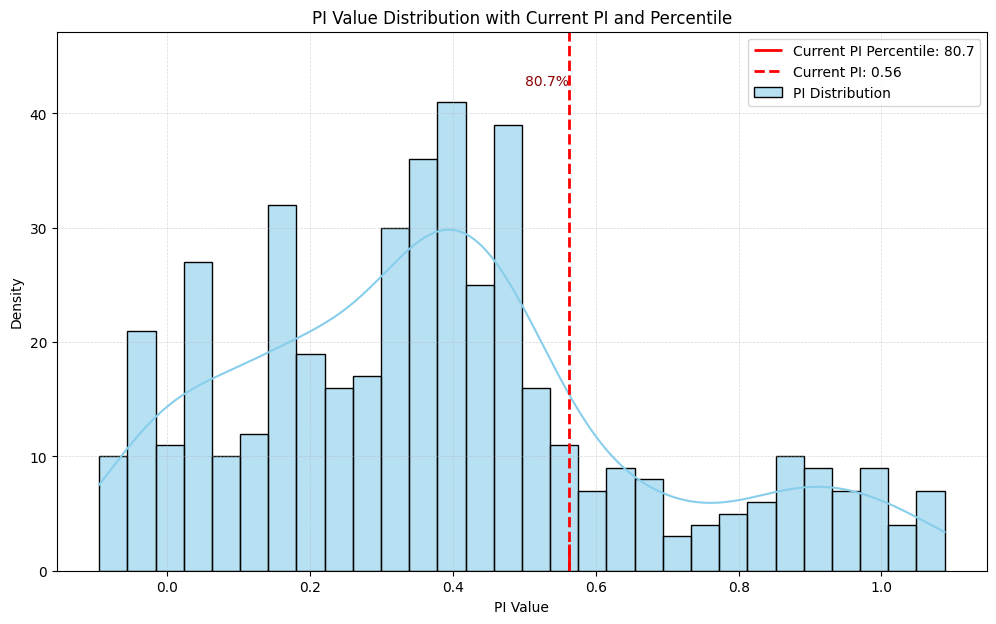

In [3]:
# Create a better visualization to showcase the current percentile and its relation with past data
plt.figure(figsize=(12, 7))

# Using seaborn's distribution plot to show the histogram along with the KDE (Kernel Density Estimate)
sns.histplot(df.pi, kde=True, color="skyblue", bins=30, alpha=0.6, label='PI Distribution')
sns.rugplot([curr], height=0.05, color="red", linewidth=2, label=f'Current PI Percentile: {percentile*100:.1f}')

# Adding a vertical line for the current PI value
plt.axvline(x=curr, color='red', linestyle='--', linewidth=2, label=f'Current PI: {curr:.2f}')

# Adding percentile information
plt.text(curr, plt.ylim()[1]*0.9, f'{percentile*100:.1f}%', color='darkred', horizontalalignment='right')

# Enhancing visualization
plt.title('PI Value Distribution with Current PI and Percentile')
plt.xlabel('PI Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

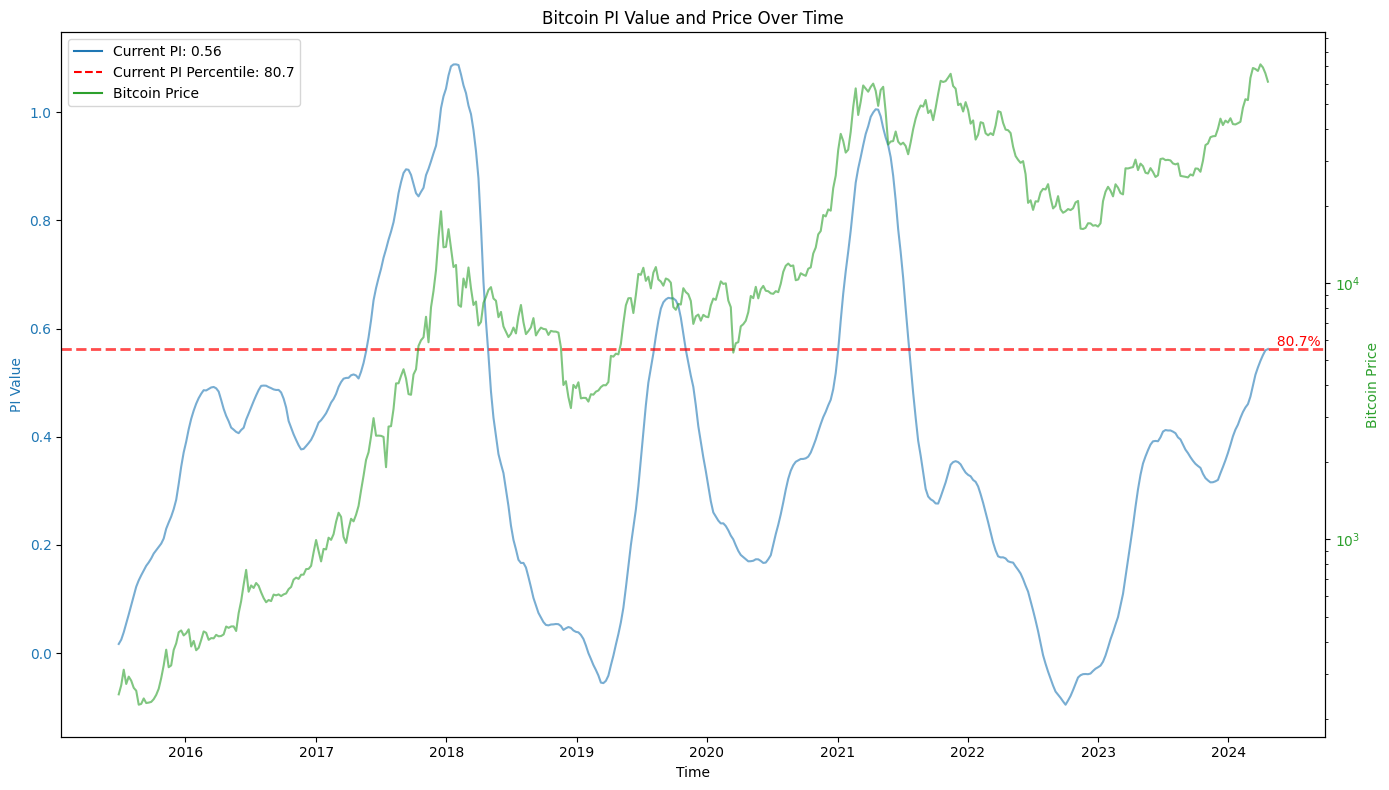

In [4]:
# Parse the dates in the format provided (day/month/year)
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y')

# Creating a dual-axis visualization to include both the PI distribution and Bitcoin price data
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('PI Value', color=color)
ax1.plot(df['time'], df['pi'], color=color, alpha=0.6, label='Current PI')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=curr, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Current PI')

# Adding text for current PI percentile directly on the plot for clarity
ax1.text(df['time'].iloc[-1], curr, f'  {percentile*100:.1f}%', color='red', verticalalignment='bottom')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Bitcoin Price', color=color)  # we already handled the x-label with ax1
ax2.plot(df['time'], df['price'], color=color, alpha=0.6, label='Bitcoin Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')  # Setting y-axis to log scale for Bitcoin price


# Adding a title and customizing layout
plt.title('Bitcoin PI Value and Price Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Set the x-axis to only show the years as labels
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Creating custom legends for both axes
pi_legend = plt.Line2D([0], [0], color='tab:blue', label=f'Current PI: {curr:.2f}')
current_pi_legend = plt.Line2D([0], [0], color='red', linestyle='--', label=f'Current PI Percentile: {percentile*100:.1f}')
price_legend = plt.Line2D([0], [0], color='tab:green', label='Bitcoin Price')
plt.legend(handles=[pi_legend, current_pi_legend, price_legend], loc='upper left')

plt.show()


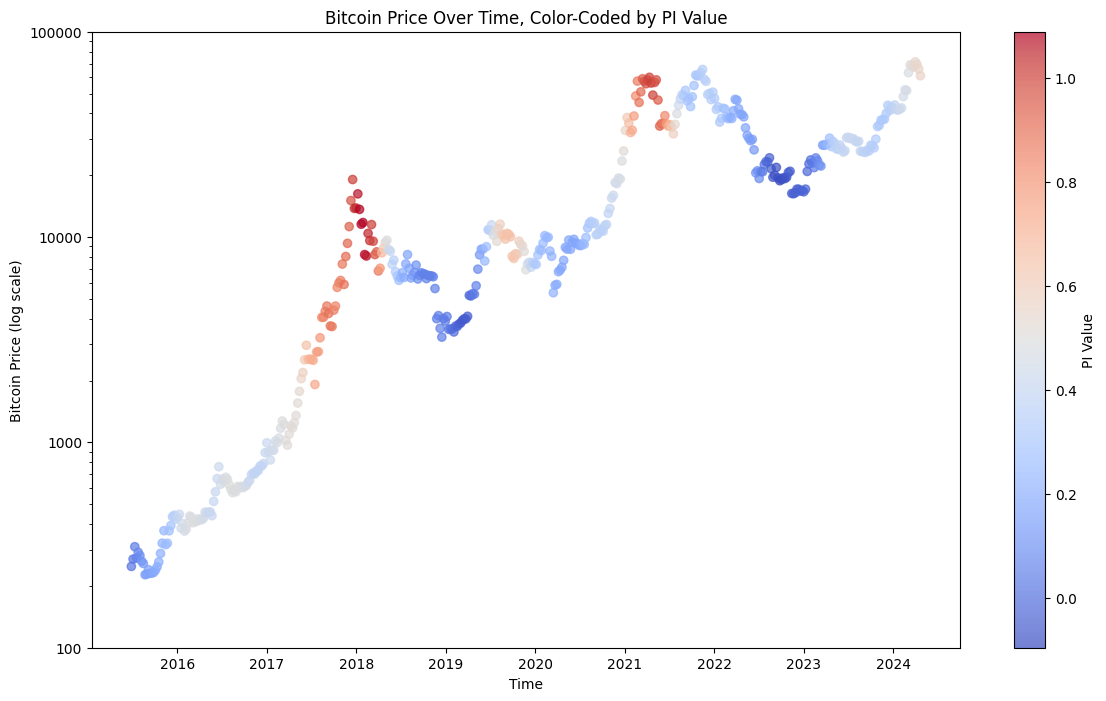

In [5]:
# Parse the dates in the format provided (day/month/year)
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y')

fig, ax = plt.subplots(figsize=(14, 8))

# Scatter plot for Bitcoin price, color-coded by PI values
sc = ax.scatter(df['time'], df['price'], c=df['pi'], cmap="coolwarm", alpha=0.7)

# Log scale for the price
ax.set_yscale('log')
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_ylim([100, 100_000])

# Set the x-axis to only show the years as labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add color bar to the right of the plot, indicating the PI value
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('PI Value')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Price (log scale)')
ax.set_title('Bitcoin Price Over Time, Color-Coded by PI Value')

plt.show()


In [6]:
print(
    f"""
Report isbtchot:
- Current level {round(curr, 2)}
- Percentile {round(percentile * 100)}
- Historical average {round(df.pi.mean(), 2)}
- Historical median {round(df.pi.median(), 2)}
    """
)


Report isbtchot:
- Current level 0.56
- Percentile 81
- Historical average 0.38
- Historical median 0.36
    
